In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

RQ1, different configurations

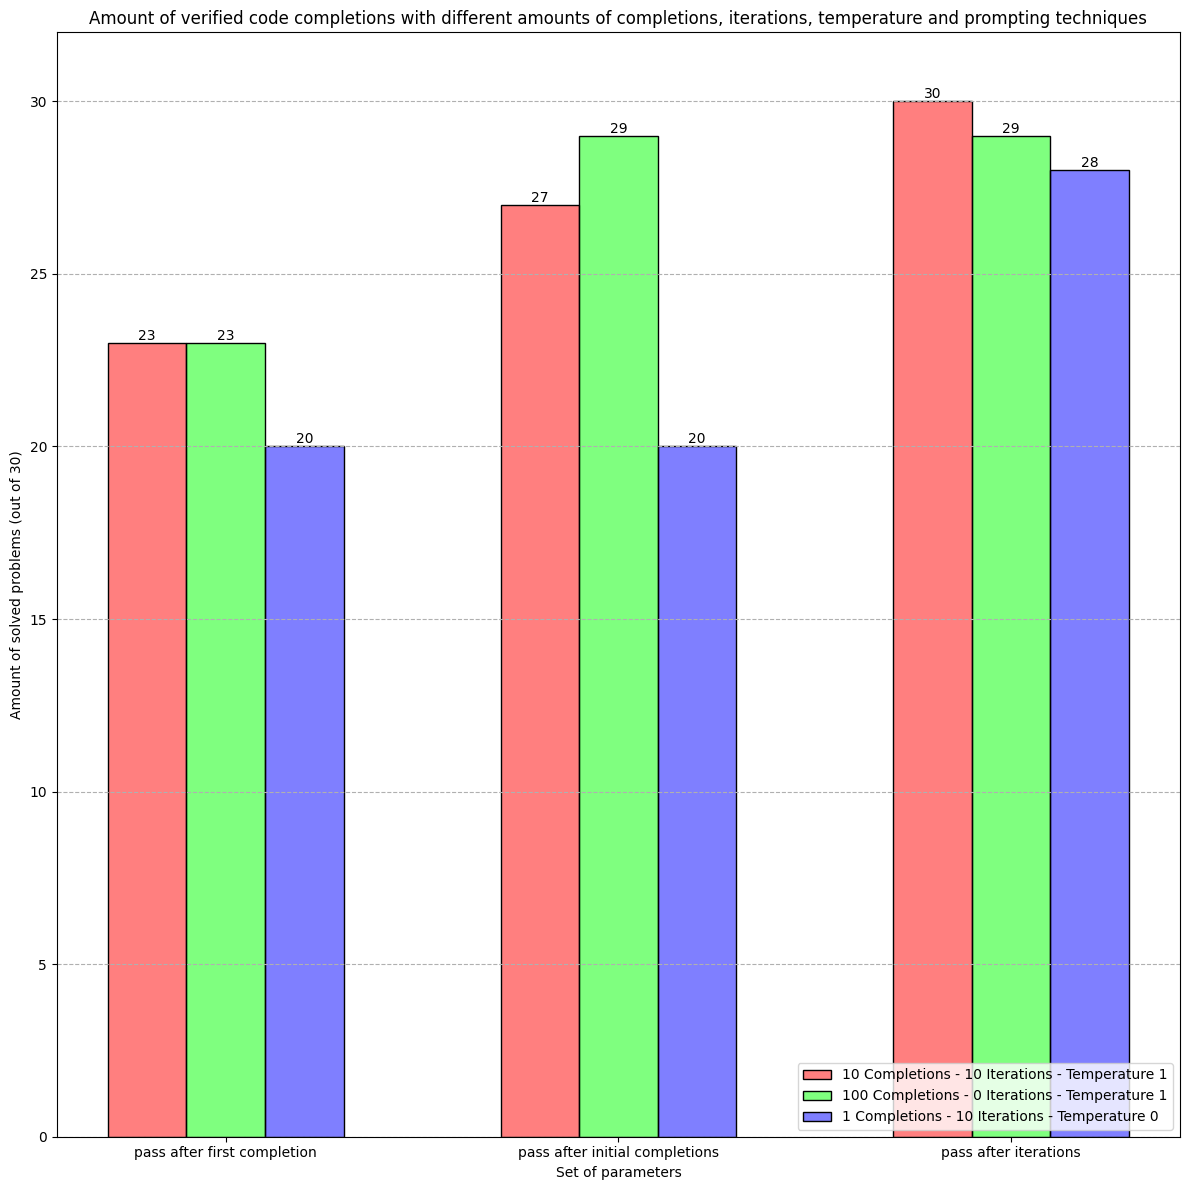

In [3]:
# Data
data = [
    'pass after first completion',
    'pass after initial completions',
    'pass after iterations',
]

index = {
    '(A) 10 Completions - 10 Iterations - Temperature 1': [23, 27, 30],
    '(B) 100 Completions - 0 Iterations - Temperature 1': [23, 29, 29],
    '(C) 1 Completions - 10 Iterations - Temperature 0': [20, 20, 28]
}


# Create DataFrame
df = pd.DataFrame(index, index=data)
labels = data

# Create the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 12))

# Reordered colors for the bars
colors = [
    (1, 0, 0, 0.5),  # red for "pass after first completion"
    (0, 1, 0, 0.5),  # green for "pass after initial completions"
    (0, 0, 1, 0.5),  # blue for "pass after iterations"
]

# Plotting
for i, (key, color) in enumerate(zip(index.keys(), colors)):
    bars = ax.bar(x + i * width, df[key], width, label=key, edgecolor='black', color=color)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Set of parameters')
ax.set_ylabel('Amount of solved problems (out of 30)')
ax.set_title('Amount of verified code completions with different amounts of completions, iterations, temperature and prompting techniques')
ax.set_xticks(x + width)
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.legend(loc='lower right')
ax.grid(axis='y', linestyle='--')
ax.set_ylim(0, 32)

# Show the plot
plt.tight_layout()
plt.show()

# Export the plot to ../figures/bar_plot_best_parameters.png
fig.savefig('../figures/bar_plot_best_parameters.png')


RQ1, different specification types

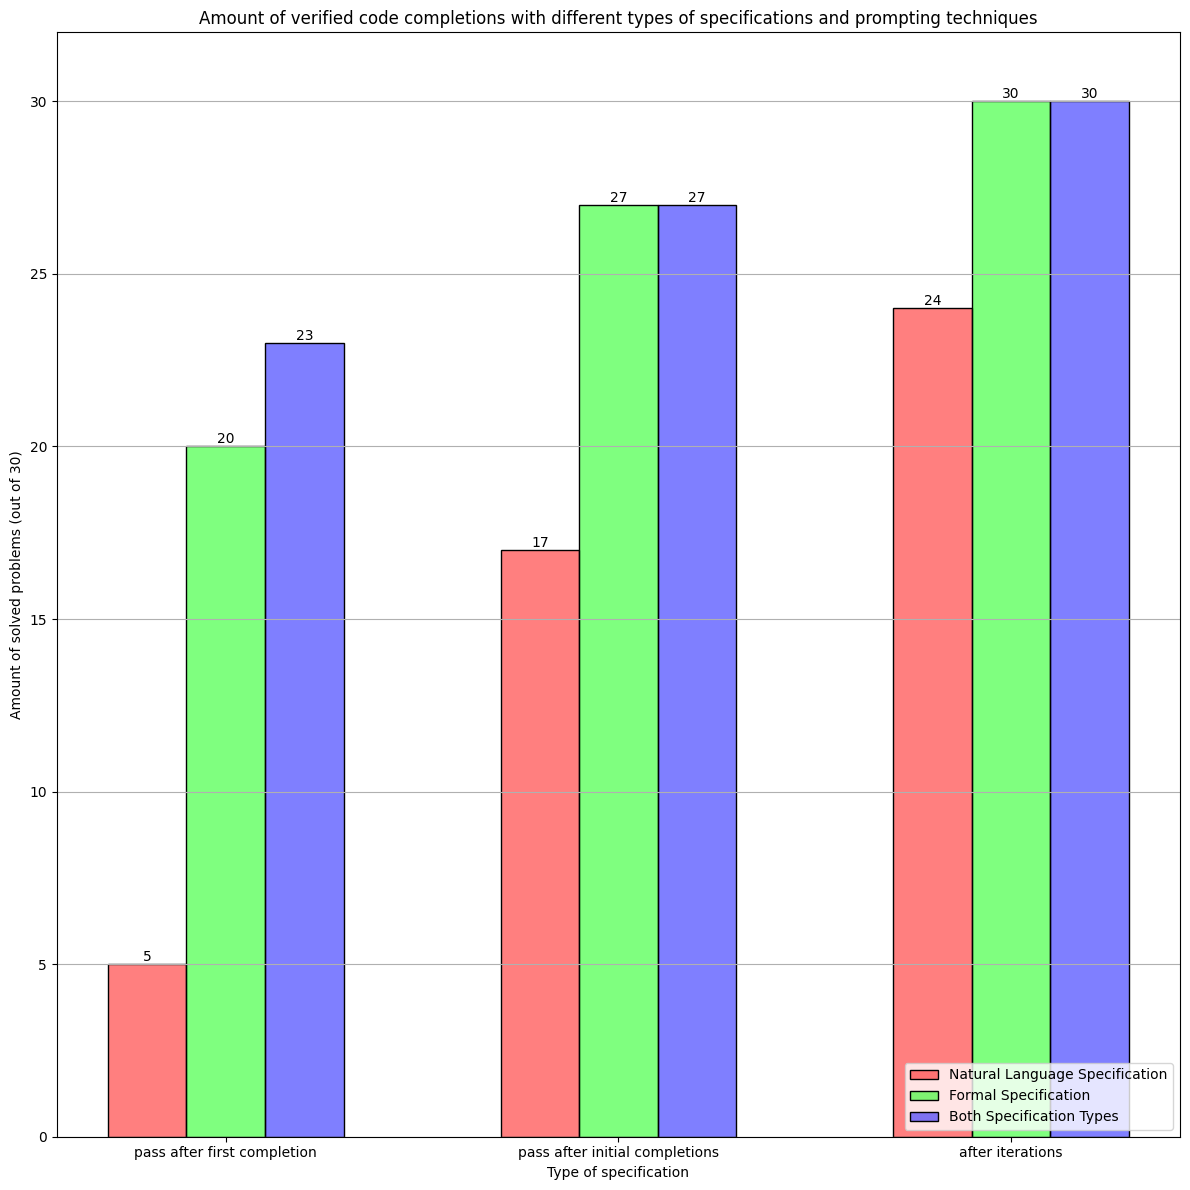

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Data
data = [
    'pass after first completion',
    'pass after initial completions',
    'after iterations',
]

index = {
    'Natural Language Specification': [5, 17, 24],
    'Formal Specification': [20, 27, 30],
    'Both Specification Types': [23, 27, 30]
}

# Create DataFrame
df = pd.DataFrame(index, index=data)
labels = data

# Create the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 12))
data_transposed = df.values.T

# Colors for each stage, with the color and transparency as tuples
colors = [
    (1, 0, 0, 0.5),  # red for "pass after first completion"
    (0, 1, 0, 0.5),  # green for "pass after initial completions"
    (0, 0, 1, 0.5),  # blue for "pass after iterations"
]

shift_so_far = 0
# Plotting
for i in range(len(data_transposed)):
    if i % 2 == 1:
        shift = 0
    else:
        shift = 0  # Adjust the space between every second bar here
        
    bars = ax.bar(x + i*width + shift_so_far + shift, data_transposed[i], width, label=f'Stage {i+1}', edgecolor='black', color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)
    shift_so_far += shift
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Type of specification')
ax.set_ylabel('Amount of solved problems (out of 30)')
ax.set_title('Amount of verified code completions with different types of specifications and prompting techniques')
ax.set_xticks(x + 0.2)
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.legend(index.keys(), loc='lower right')
ax.grid(axis='y')
ax.set_ylim(0, 32)

# Show the plot
plt.tight_layout()
plt.show()

# Export the plot to ../figures/bar_plot_best_parameters.png
fig.savefig('../figures/bar_plot_best_spectype2.png')


RQ1, prompting techniques

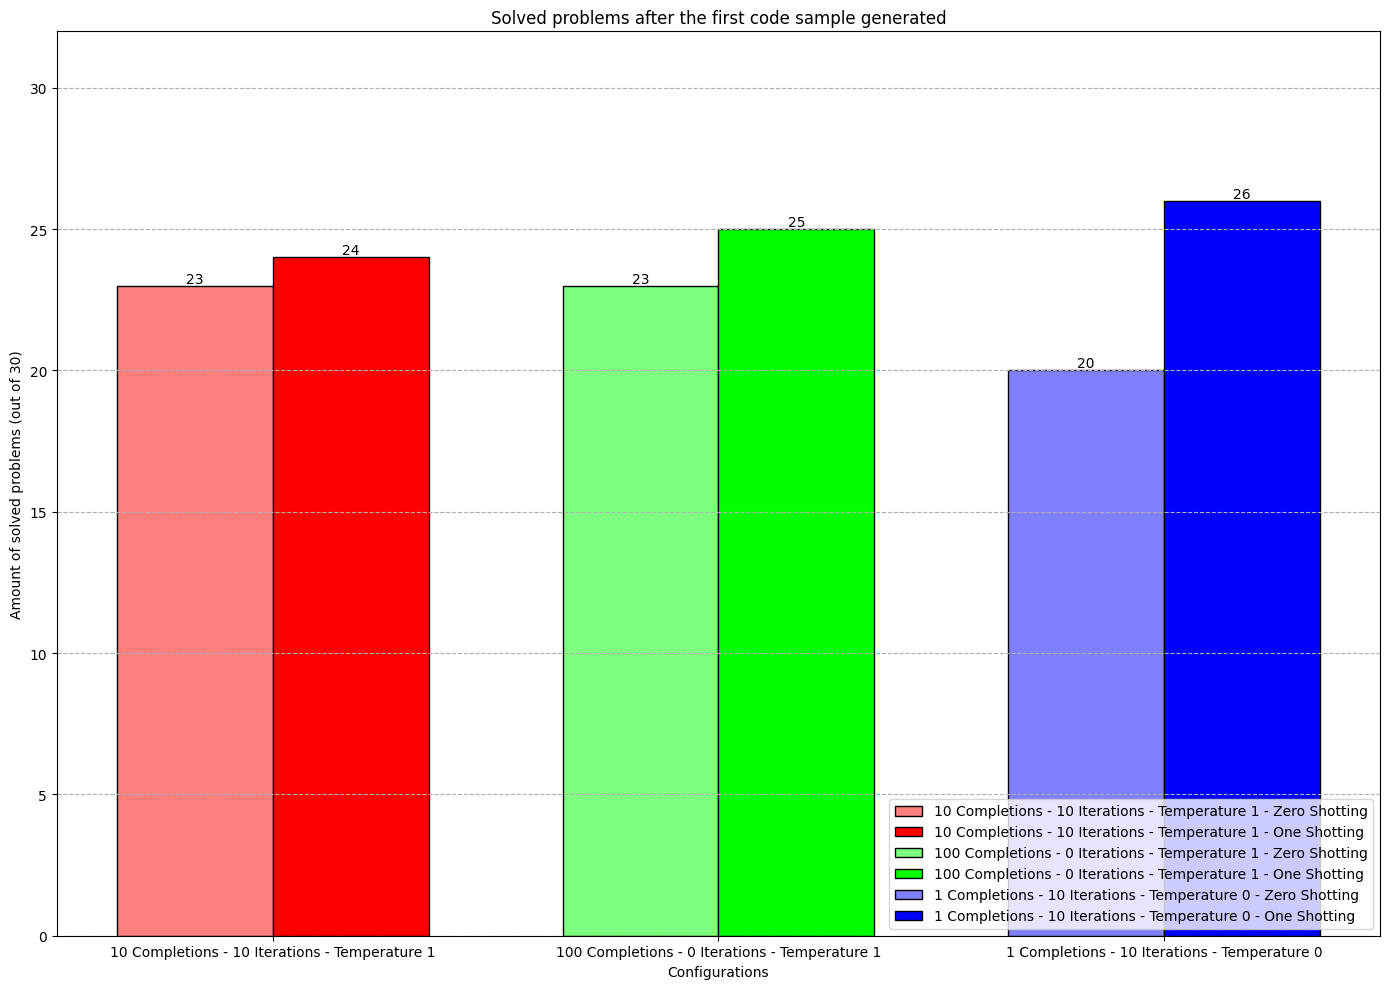

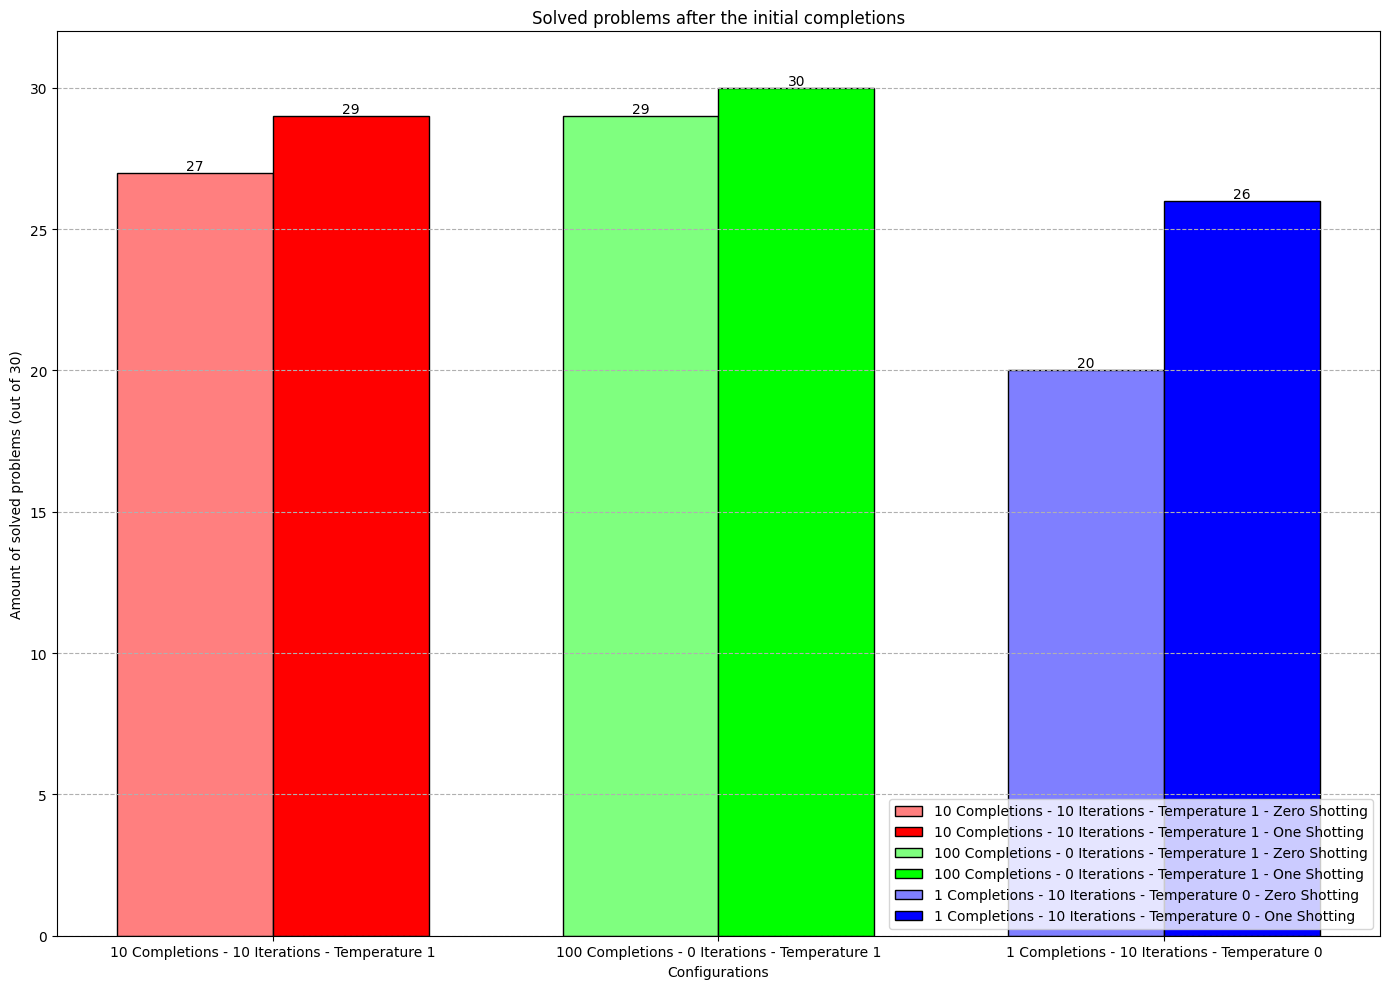

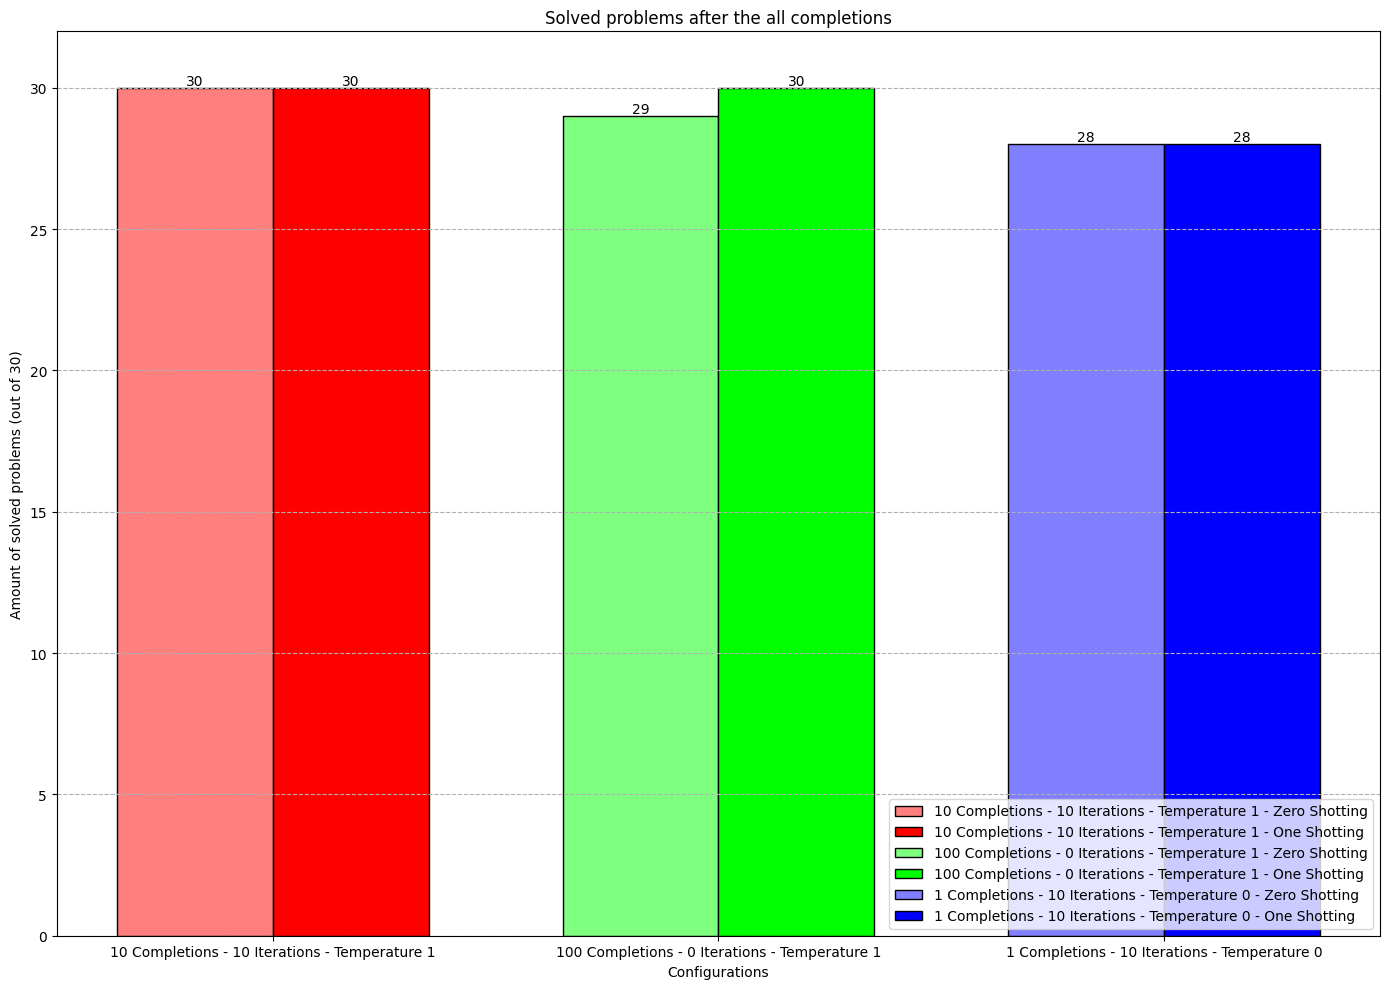

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = [
    'pass after first completion',
    'pass after initial completions',
    'pass after iterations',
]

# Combined Index Dictionary
index = {
    '10 Completions - 10 Iterations - Temperature 1 - Zero Shotting': [23, 27, 30],
    '100 Completions - 0 Iterations - Temperature 1 - Zero Shotting': [23, 29, 29],
    '1 Completions - 10 Iterations - Temperature 0 - Zero Shotting': [20, 20, 28],
    '10 Completions - 10 Iterations - Temperature 1 - One Shotting': [24, 29, 30],
    '100 Completions - 0 Iterations - Temperature 1 - One Shotting': [25, 30, 30],
    '1 Completions - 10 Iterations - Temperature 0 - One Shotting': [26, 26, 28]
}

# Create DataFrame
df = pd.DataFrame(index, index=data)

# Extract configurations and methods
configurations = [
    '10 Completions - 10 Iterations - Temperature 1',
    '100 Completions - 0 Iterations - Temperature 1',
    '1 Completions - 10 Iterations - Temperature 0'
]
methods = ['Zero Shotting', 'One Shotting']

# Color mapping for configurations
colors = {
    '10 Completions - 10 Iterations - Temperature 1': (1, 0, 0, 0.5),
    '100 Completions - 0 Iterations - Temperature 1': (0, 1, 0, 0.5),
    '1 Completions - 10 Iterations - Temperature 0': (0, 0, 1, 0.5)
}

# Define plotting function
def plot_data(category_data, title, filename):
    x = np.arange(len(configurations))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plotting
    for i, config in enumerate(configurations):
        zero_shot_key = f"{config} - Zero Shotting"
        one_shot_key = f"{config} - One Shotting"
        zero_shot_val = category_data[zero_shot_key]
        one_shot_val = category_data[one_shot_key]

        bars1 = ax.bar(x[i] - width/2, zero_shot_val, width, label=f'{config} - Zero Shotting', edgecolor='black', color=colors[config])
        bars2 = ax.bar(x[i] + width/2, one_shot_val, width, label=f'{config} - One Shotting', edgecolor='black', color=colors[config], alpha=1)
        
        ax.text(x[i] - width/2, zero_shot_val, f'{zero_shot_val}', ha='center', va='bottom', fontsize=10)
        ax.text(x[i] + width/2, one_shot_val, f'{one_shot_val}', ha='center', va='bottom', fontsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Configurations')
    ax.set_ylabel('Amount of solved problems (out of 30)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(configurations)
    ax.legend(loc='lower right')
    ax.grid(axis='y', linestyle='--')
    ax.set_ylim(0, 32)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Export the plot
    fig.savefig(filename)

# Plot each category
for category, title, filename in zip(data,
                                     ['Solved problems after the first code sample generated', 'Solved problems after the initial completions', 'Solved problems after the all completions'],
                                     ['../figures/pass_after_first_completion.png', '../figures/pass_after_initial_completions.png', '../figures/pass_after_iterations.png']):
    category_data = df.loc[category]
    plot_data(category_data, title, filename)


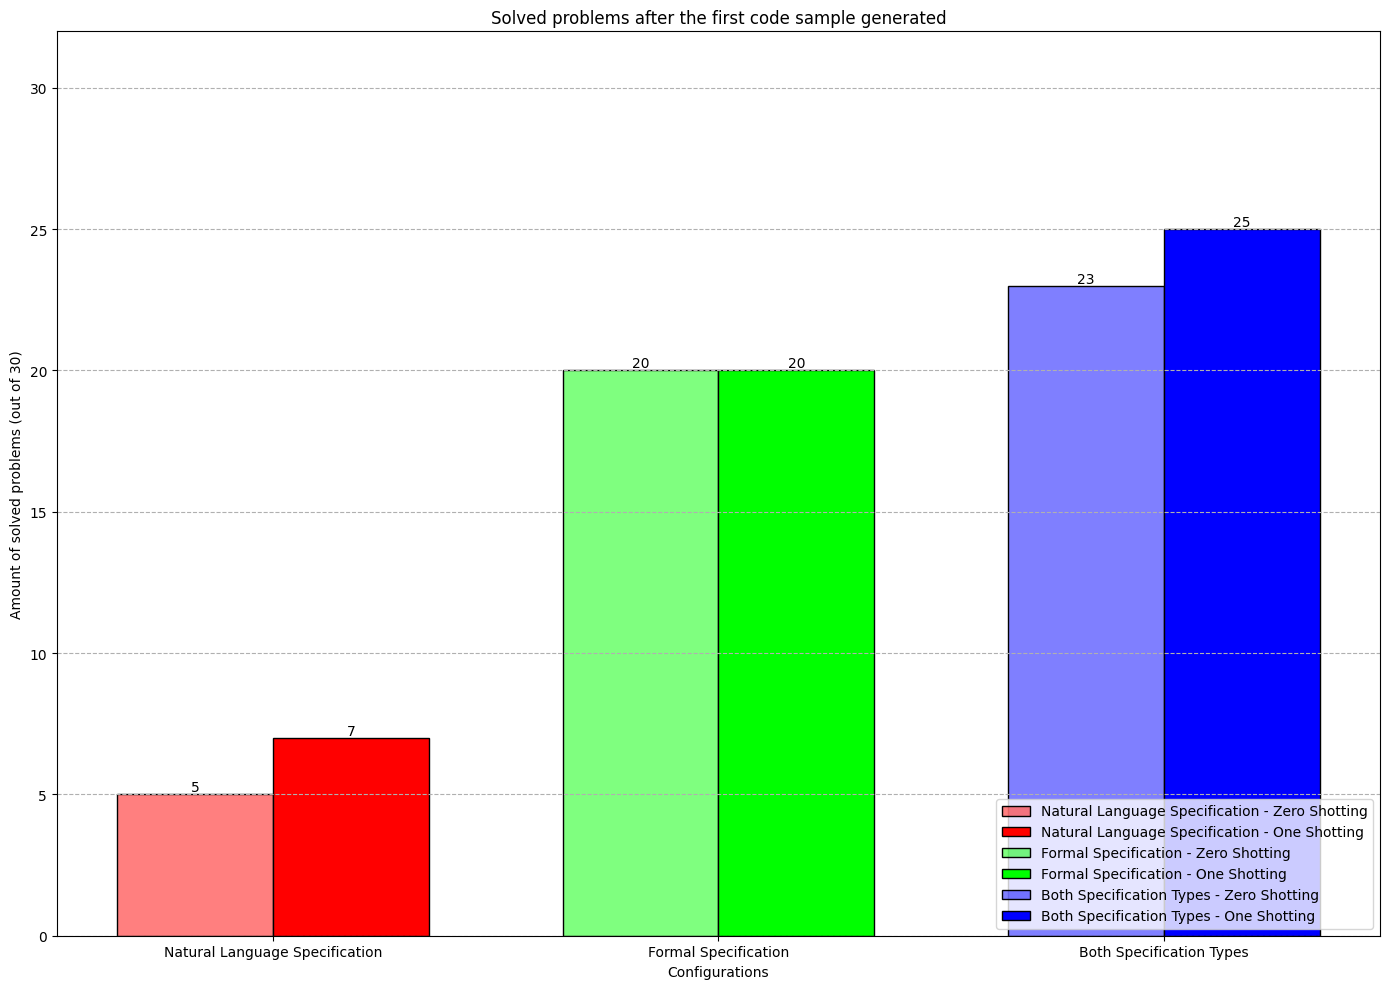

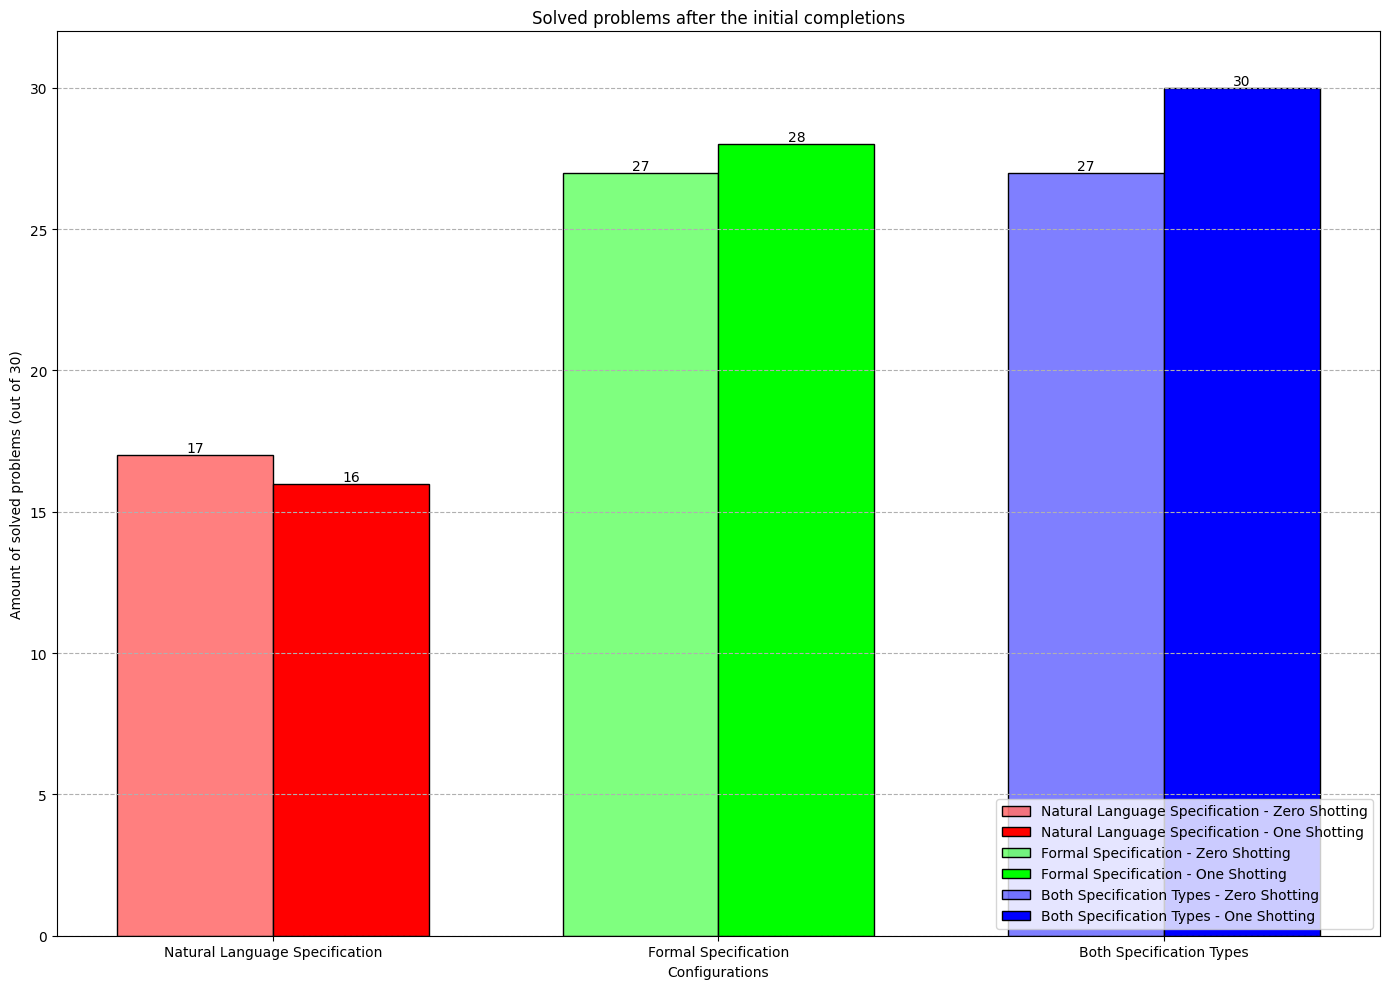

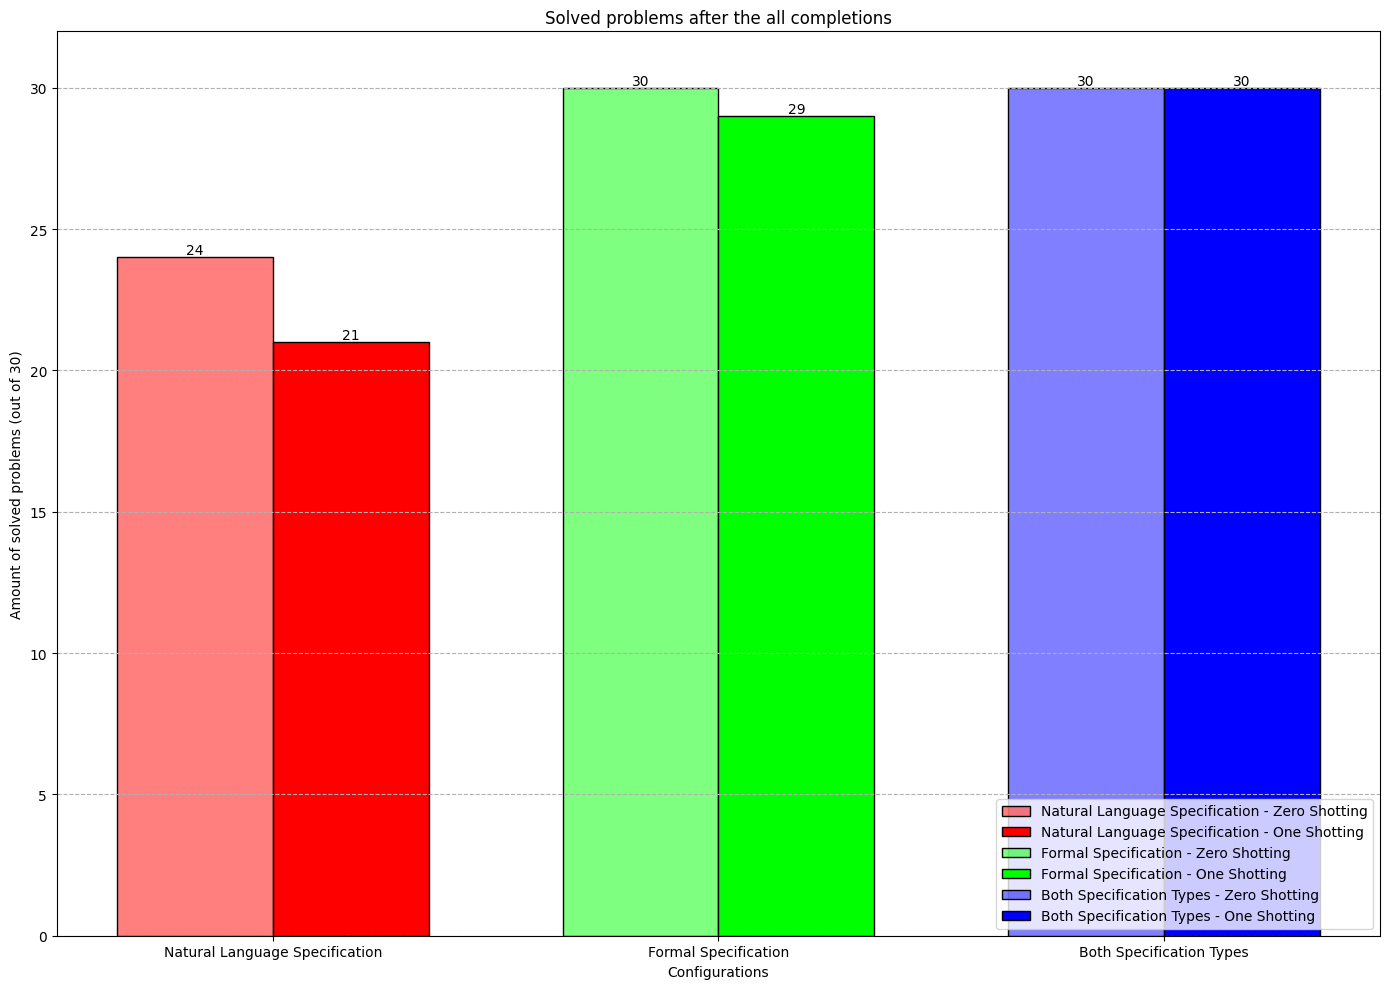

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = [
    'pass after first completion',
    'pass after initial completions',
    'pass after iterations',
]

index = {
    'Natural Language Specification - Zero Shotting': [5, 17, 24],
    'Natural Language Specification - One Shotting': [7, 16, 21],
    'Formal Specification - Zero Shotting': [20, 27, 30],
    'Formal Specification - One Shotting': [20, 28, 29],
    'Both Specification Types - Zero Shotting': [23, 27, 30],
    'Both Specification Types - One Shotting': [25, 30, 30]
}

# Create DataFrame
df = pd.DataFrame(index, index=data)

# Extract configurations and methods
configurations = [
    'Natural Language Specification',
    'Formal Specification',
    'Both Specification Types'
]
methods = ['Zero Shotting', 'One shotting']

# Color mapping for configurations
colors = {
    'Natural Language Specification': (1, 0, 0, 0.5),
    'Formal Specification': (0, 1, 0, 0.5),
    'Both Specification Types': (0, 0, 1, 0.5)
}

# Define plotting function
def plot_data(category_data, title, filename):
    x = np.arange(len(configurations))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plotting
    for i, config in enumerate(configurations):
        zero_shot_key = f"{config} - Zero Shotting"
        one_shot_key = f"{config} - One Shotting"
        zero_shot_val = category_data[zero_shot_key]
        one_shot_val = category_data[one_shot_key]

        bars1 = ax.bar(x[i] - width/2, zero_shot_val, width, label=f'{config} - Zero Shotting', edgecolor='black', color=colors[config])
        bars2 = ax.bar(x[i] + width/2, one_shot_val, width, label=f'{config} - One Shotting', edgecolor='black', color=colors[config], alpha=1)
        
        ax.text(x[i] - width/2, zero_shot_val, f'{zero_shot_val}', ha='center', va='bottom', fontsize=10)
        ax.text(x[i] + width/2, one_shot_val, f'{one_shot_val}', ha='center', va='bottom', fontsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Configurations')
    ax.set_ylabel('Amount of solved problems (out of 30)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(configurations)
    ax.legend(loc='lower right')
    ax.grid(axis='y', linestyle='--')
    ax.set_ylim(0, 32)

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Export the plot
    fig.savefig(filename)

# Plot each category
for category, title, filename in zip(data,
                                     ['Solved problems after the first code sample generated', 'Solved problems after the initial completions', 'Solved problems after the all completions'],
                                     ['../figures/passafterone_specs.png', '../figures/passafterinitial_specs.png', '../figures/passfinal_specs.png']):
    category_data = df.loc[category]
    plot_data(category_data, title, filename)


Remainder

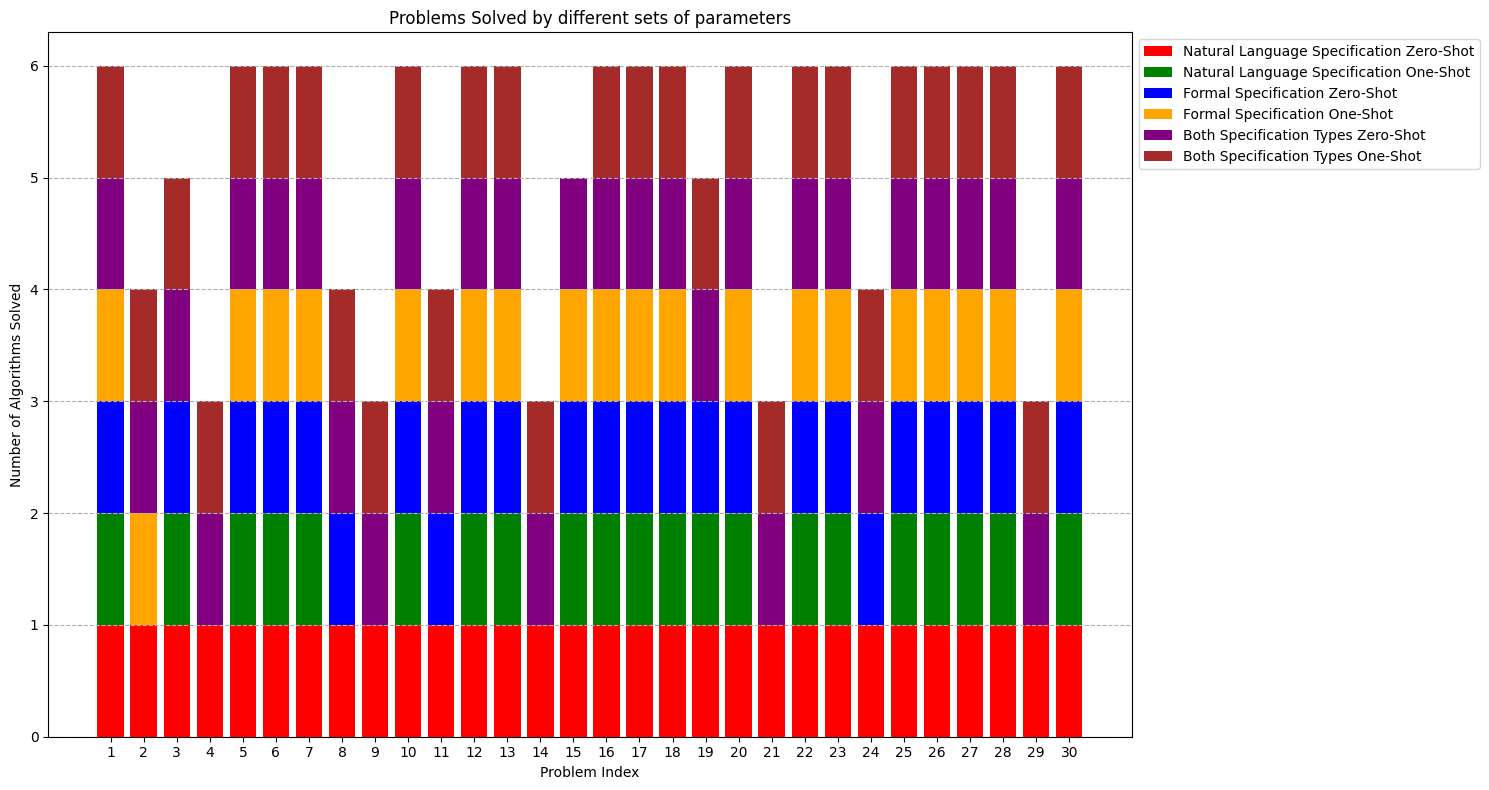

In [20]:
# Data
data = {
    "SHEET_NAME": range(1, 31),
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Natural Language Specification One-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification Zero-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification One-Shot": ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Y'/'N' to 1/0
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Colors for each algorithm
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot each algorithm's results in a stacked manner
bottom = np.zeros(len(df))
for i, col in enumerate(df.columns[1:]):
    ax.bar(df['SHEET_NAME'], df[col], bottom=bottom, label=col, color=colors[i])
    bottom += df[col]

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(df['SHEET_NAME'])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
# Display the plot
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


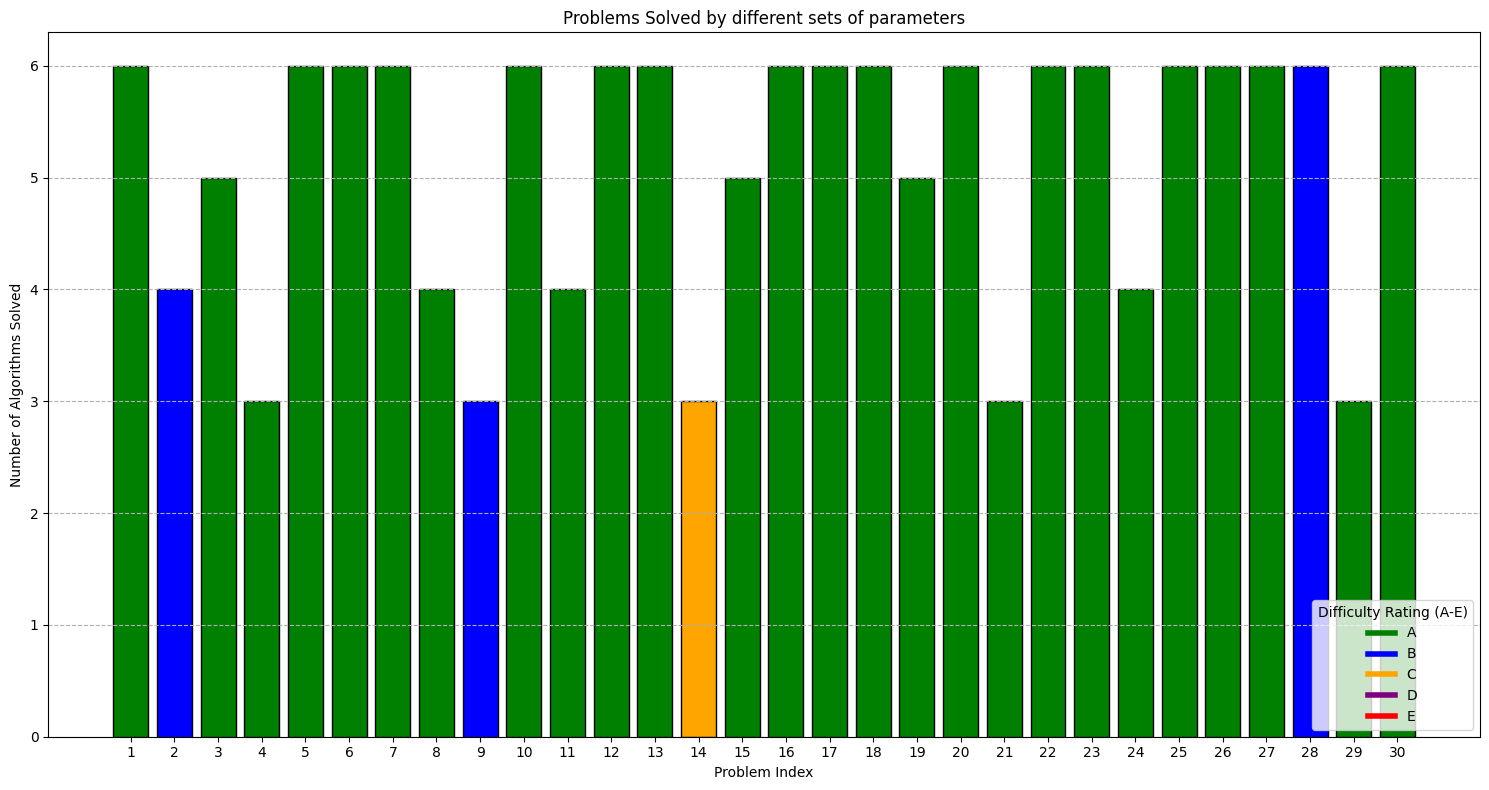

In [16]:
# Data

sheet_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

data = {
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Natural Language Specification One-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification Zero-Shot": ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Formal Specification One-Shot": ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
}

difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'purple',
    'E': 'red'
}

colors = pd.DataFrame({'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A']})['Difficulty rating (A-E)'].map(difficulty_colors)




handles = [plt.Line2D([0], [0], color=color, lw=4) for color in difficulty_colors.values()]
labels = difficulty_colors.keys()

# For each index from 1 up to 30 count the amount of 'Y' in each column
values = []
for i in range(0, 30):
    # Amount of Y's
    y_count = 0
    # Count the Y's for each column
    for col in data.keys():
        # Get the values
        if data[col][i] == 'Y':
            y_count += 1
    values.append(y_count)


# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each algorithm's results in a stacked manner
ax.bar(sheet_names, values, color=colors, edgecolor='black')

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(sheet_names)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
ax.legend(handles, labels, title="Difficulty Rating (A-E)", loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

# Expolrt the plot to ../figures/bar_plot_difficulty.png
fig.savefig('../figures/bar_plot_difficulty_solution_tied.png')


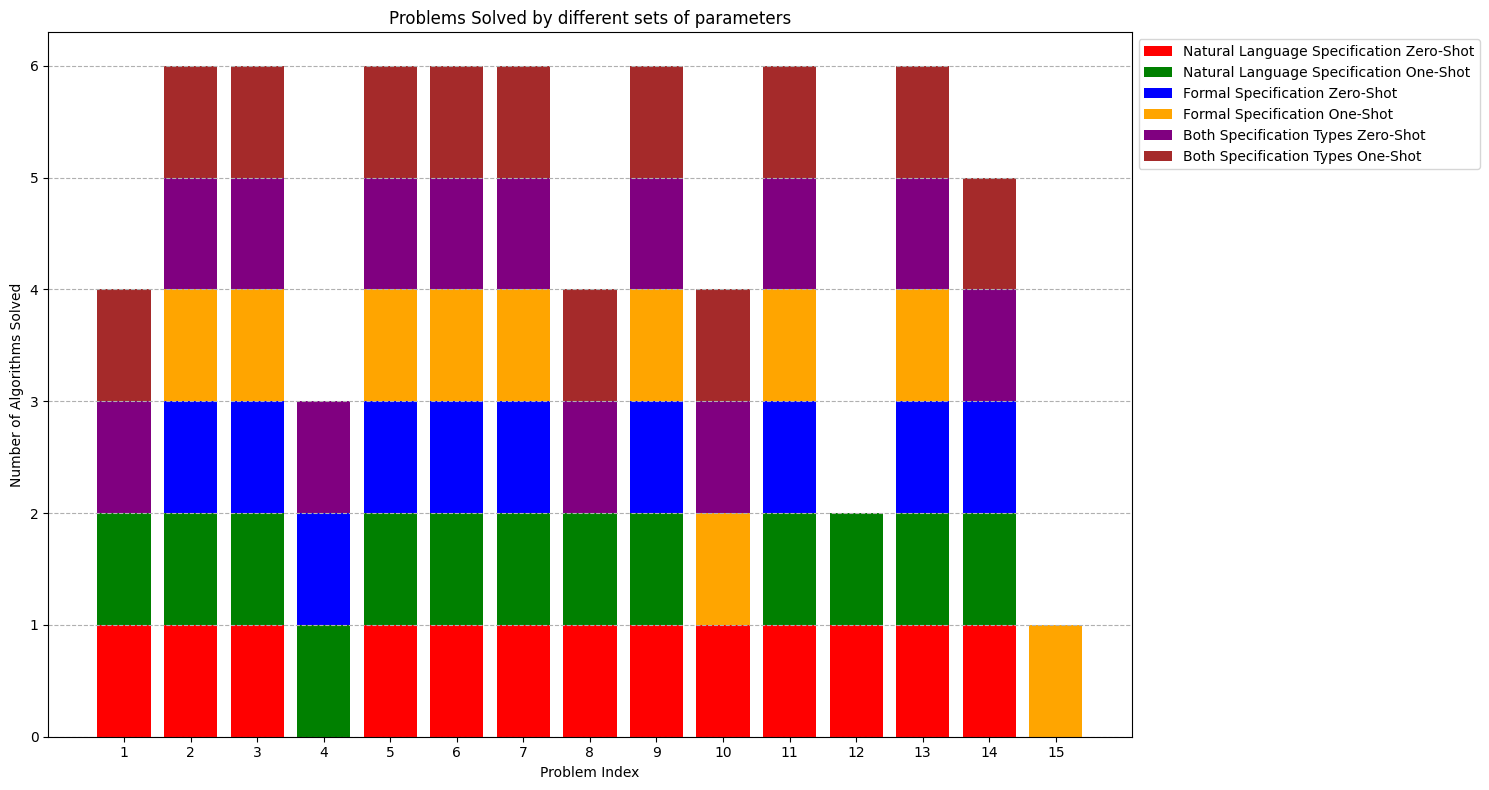

In [9]:
# Data
data = {
    "SHEET_NAME": range(1, 16),
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'],
    "Natural Language Specification One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N'],
    "Formal Specification Zero-Shot": ['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N'],
    "Formal Specification One-Shot": ['N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N']
}


# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Y'/'N' to 1/0
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Colors for each algorithm
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot each algorithm's results in a stacked manner
bottom = np.zeros(len(df))
for i, col in enumerate(df.columns[1:]):
    ax.bar(df['SHEET_NAME'], df[col], bottom=bottom, label=col, color=colors[i])
    bottom += df[col]

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(df['SHEET_NAME'])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
# Display the plot
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


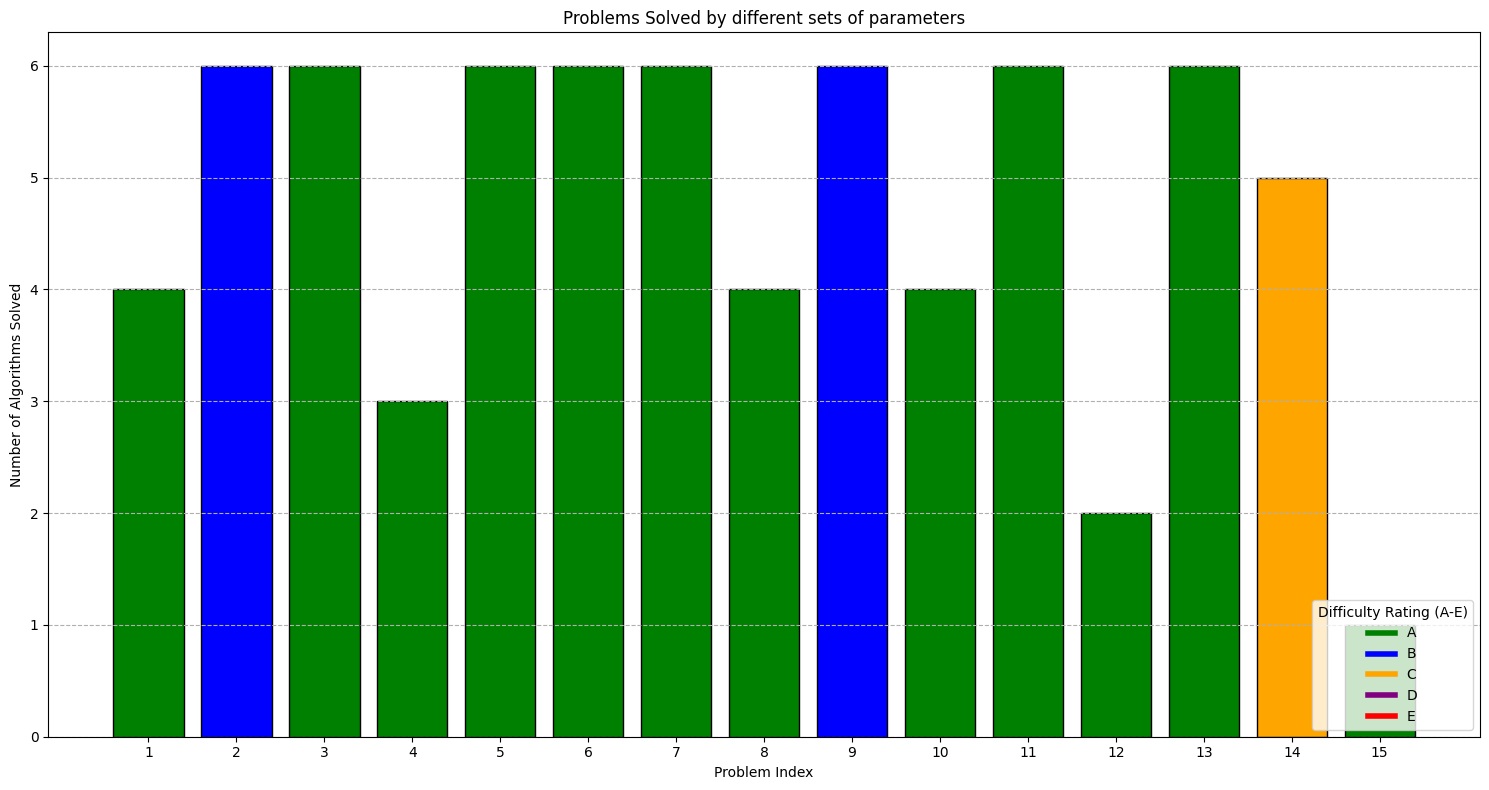

In [17]:
sheet_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
data = {
    "Natural Language Specification Zero-Shot": ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'],
    "Natural Language Specification One-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N'],
    "Formal Specification Zero-Shot": ['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N'],
    "Formal Specification One-Shot": ['N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y'],
    "Both Specification Types Zero-Shot": ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'],
    "Both Specification Types One-Shot": ['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N']
}



difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'purple',
    'E': 'red'
}

colors = pd.DataFrame({'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A']})['Difficulty rating (A-E)'].map(difficulty_colors)




handles = [plt.Line2D([0], [0], color=color, lw=4) for color in difficulty_colors.values()]
labels = difficulty_colors.keys()

# For each index from 1 up to 30 count the amount of 'Y' in each column
values = []
for i in range(0, 15):
    # Amount of Y's
    y_count = 0
    # Count the Y's for each column
    for col in data.keys():
        # Get the values
        if data[col][i] == 'Y':
            y_count += 1
    values.append(y_count)


# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each algorithm's results in a stacked manner
ax.bar(sheet_names, values, color=colors, edgecolor='black')

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Number of Algorithms Solved')
ax.set_title('Problems Solved by different sets of parameters')
ax.set_xticks(sheet_names)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--')
ax.legend(handles, labels, title="Difficulty Rating (A-E)", loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

fig.savefig('../figures/bar_plot_difficulty_desc.png')


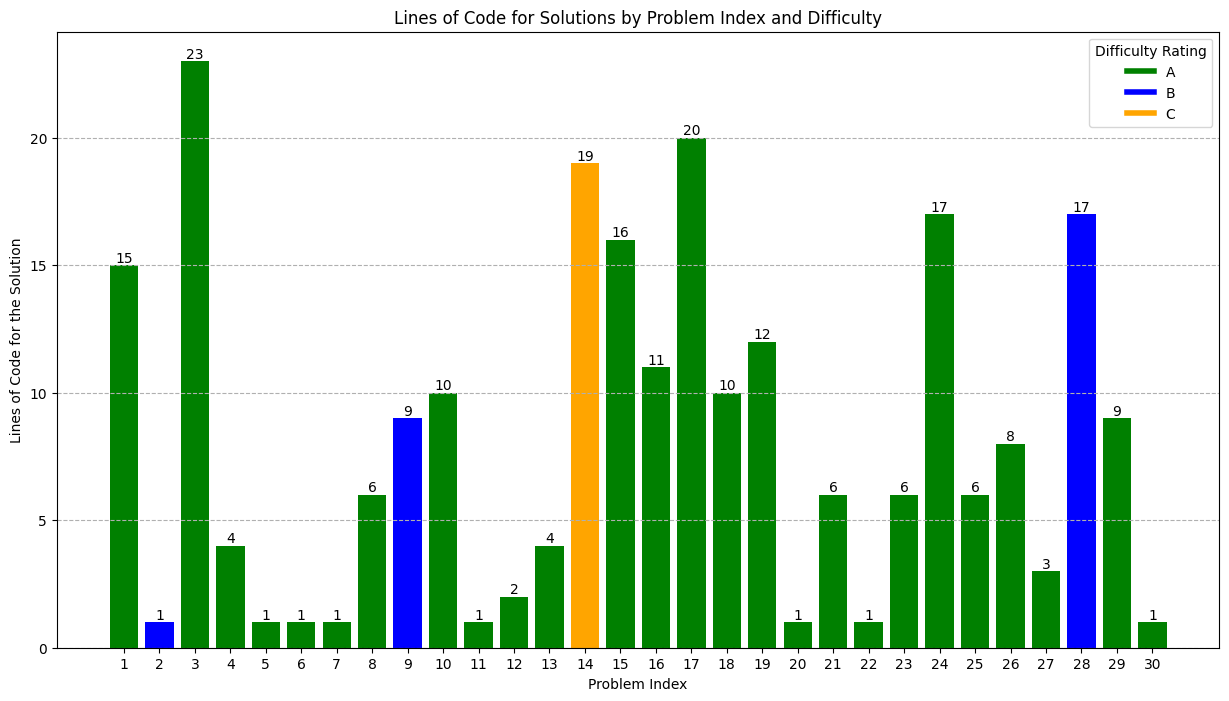

In [22]:
# Data
data = {
    'index': range(1, 31),
    'Difficulty rating (A-E)': ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A'],
    'Lines of code for the solution': [15, 1, 23, 4, 1, 1, 1, 6, 9, 10, 1, 2, 4, 19, 16, 11, 20, 10, 12, 1, 6, 1, 6, 17, 6, 8, 3, 17, 9, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Color map for difficulties
difficulty_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange'
}

# Assign colors based on difficulty
df['color'] = df['Difficulty rating (A-E)'].map(difficulty_colors)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars with color coding
bars = ax.bar(df['index'], df['Lines of code for the solution'], color=df['color'])

# Adding labels and title
ax.set_xlabel('Problem Index')
ax.set_ylabel('Lines of Code for the Solution')
ax.set_title('Lines of Code for Solutions by Problem Index and Difficulty')
ax.grid(axis='y', linestyle='--')
ax.set_xticks(df['index'])

# add values above
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

# Create custom legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in difficulty_colors.values()]
labels = difficulty_colors.keys()
ax.legend(handles, labels, title="Difficulty Rating")

# Display the plot
plt.show()

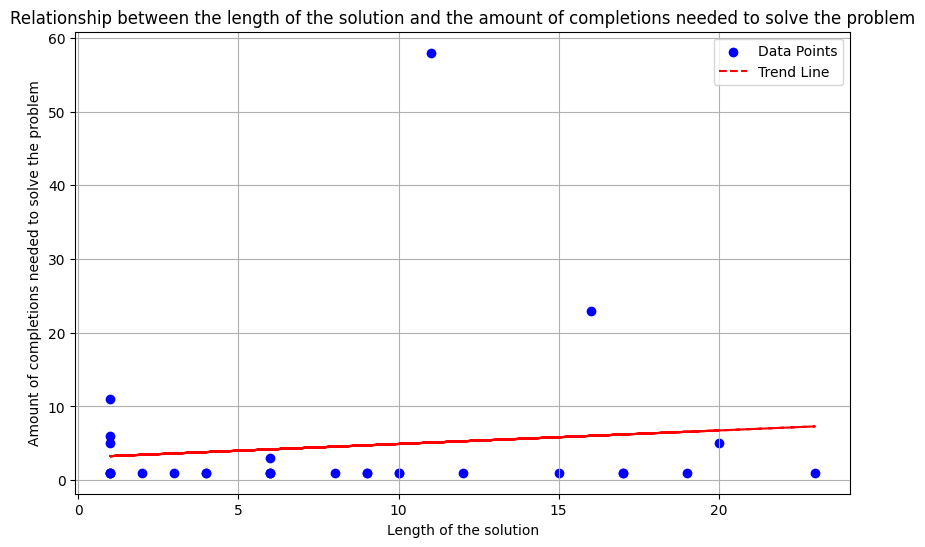

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
# Provided data
x_values = np.array([1, 11, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 23, 58, 5, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1])
y_values = np.array([15, 1, 23, 4, 1, 1, 6, 9, 10, 1, 2, 4, 19, 16, 11, 20, 10, 12, 1, 1, 6, 6, 17, 6, 8, 3, 17, 9, 1])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_values, x_values, color='blue', label='Data Points')

# Fit a linear regression model
model = LinearRegression().fit(y_values.reshape(-1, 1), x_values)
trendline = model.predict(y_values.reshape(-1, 1))

# Plot the trend line
plt.plot(y_values, trendline, color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Length of the solution')
plt.ylabel('Amount of completions needed to solve the problem')
plt.title('Relationship between the length of the solution and the amount of completions needed to solve the problem')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\ merlijn\AppData\Local\Temp\ipykernel_15724\2476741097.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Configuration', y='Completions', data=df_melted, palette='Set3')


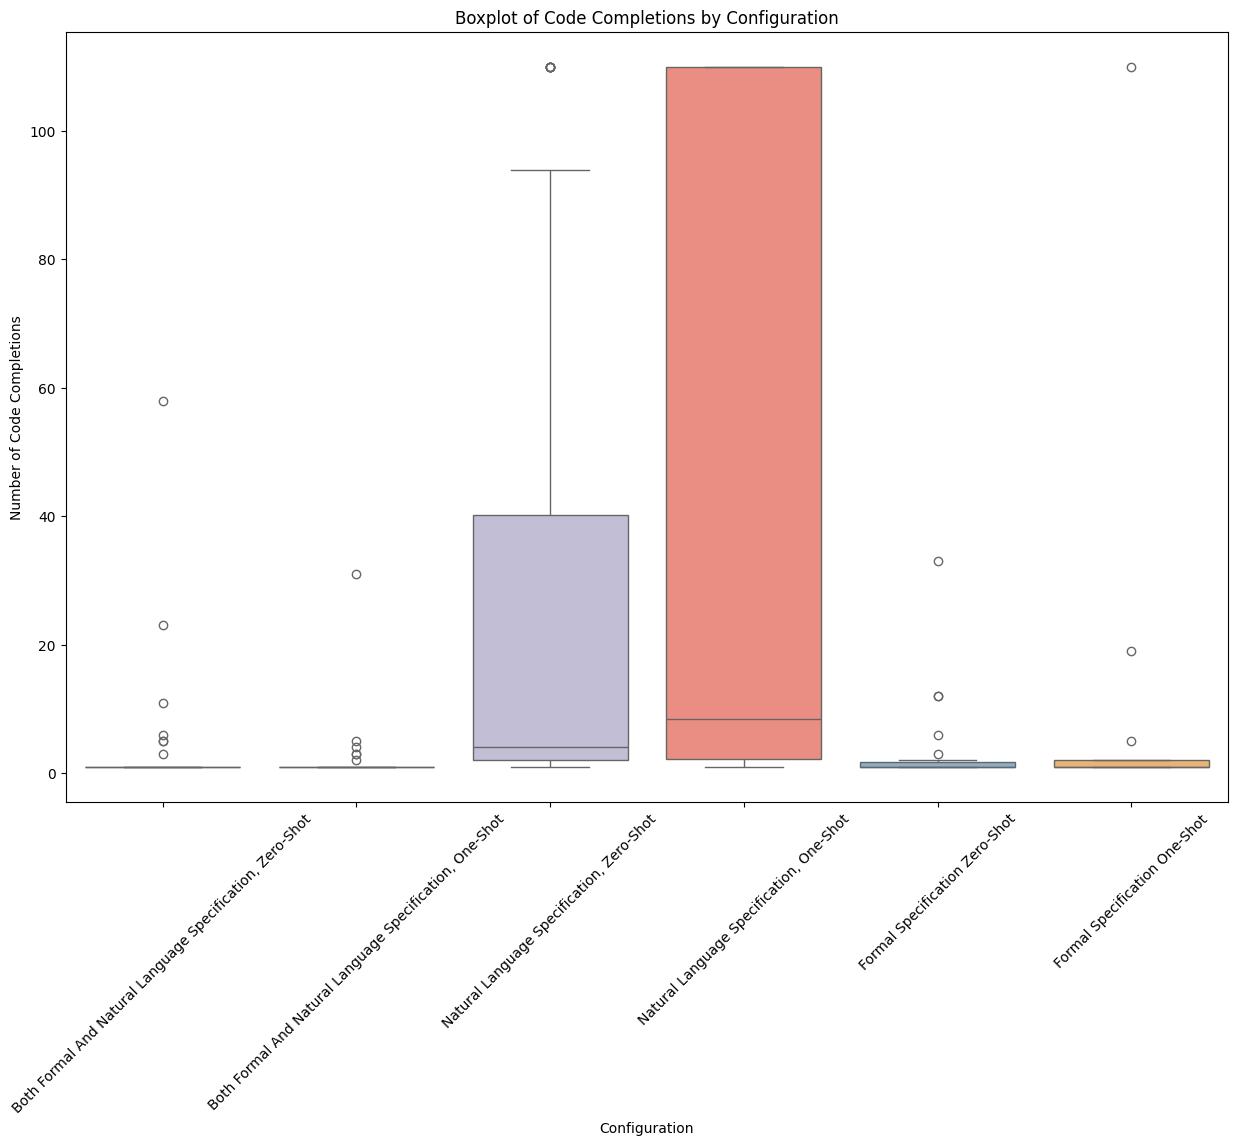

In [12]:

# Data
data = {
    'SHEET_NAME': range(1, 31),
    'Both Formal And Natural Language Specification, Zero-Shot': [1, 11, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 23, 58, 5, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1],
    'Both Formal And Natural Language Specification, One-Shot': [1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 31, 5, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
    'Natural Language Specification, Zero-Shot': [2, 110, 1, 110, 1, 29, 8, 23, 110, 4, 2, 3, 1, 110, 11, 23, 3, 3, 94, 1, 110, 3, 4, 3, 2, 44, 12, 2, 110, 1],
    'Natural Language Specification, One-Shot': [1, 110, 13, 110, 1, 15, 9, 110, 110, 3, 110, 8, 1, 110, 5, 13, 7, 99, 5, 1, 110, 1, 5, 110, 14, 7, 2, 1, 110, 1],
    'Formal Specification Zero-Shot': [1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 33, 12, 1, 1, 1, 12, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2],
    'Formal Specification One-Shot': [1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 19, 110, 2, 2, 1, 5, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Replace empty strings with NaN to avoid plotting them
df.replace('', pd.NA, inplace=True)

# Convert the DataFrame to a long format for seaborn
df_melted = df.melt(id_vars='SHEET_NAME', var_name='Configuration', value_name='Completions')

# Create a boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Configuration', y='Completions', data=df_melted, palette='Set3')

# Adding labels and title
plt.xlabel('Configuration')
plt.ylabel('Number of Code Completions')
plt.title('Boxplot of Code Completions by Configuration')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\ merlijn\AppData\Local\Temp\ipykernel_33356\814907275.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Configuration', y='Completions', data=df_melted, palette='Set3')


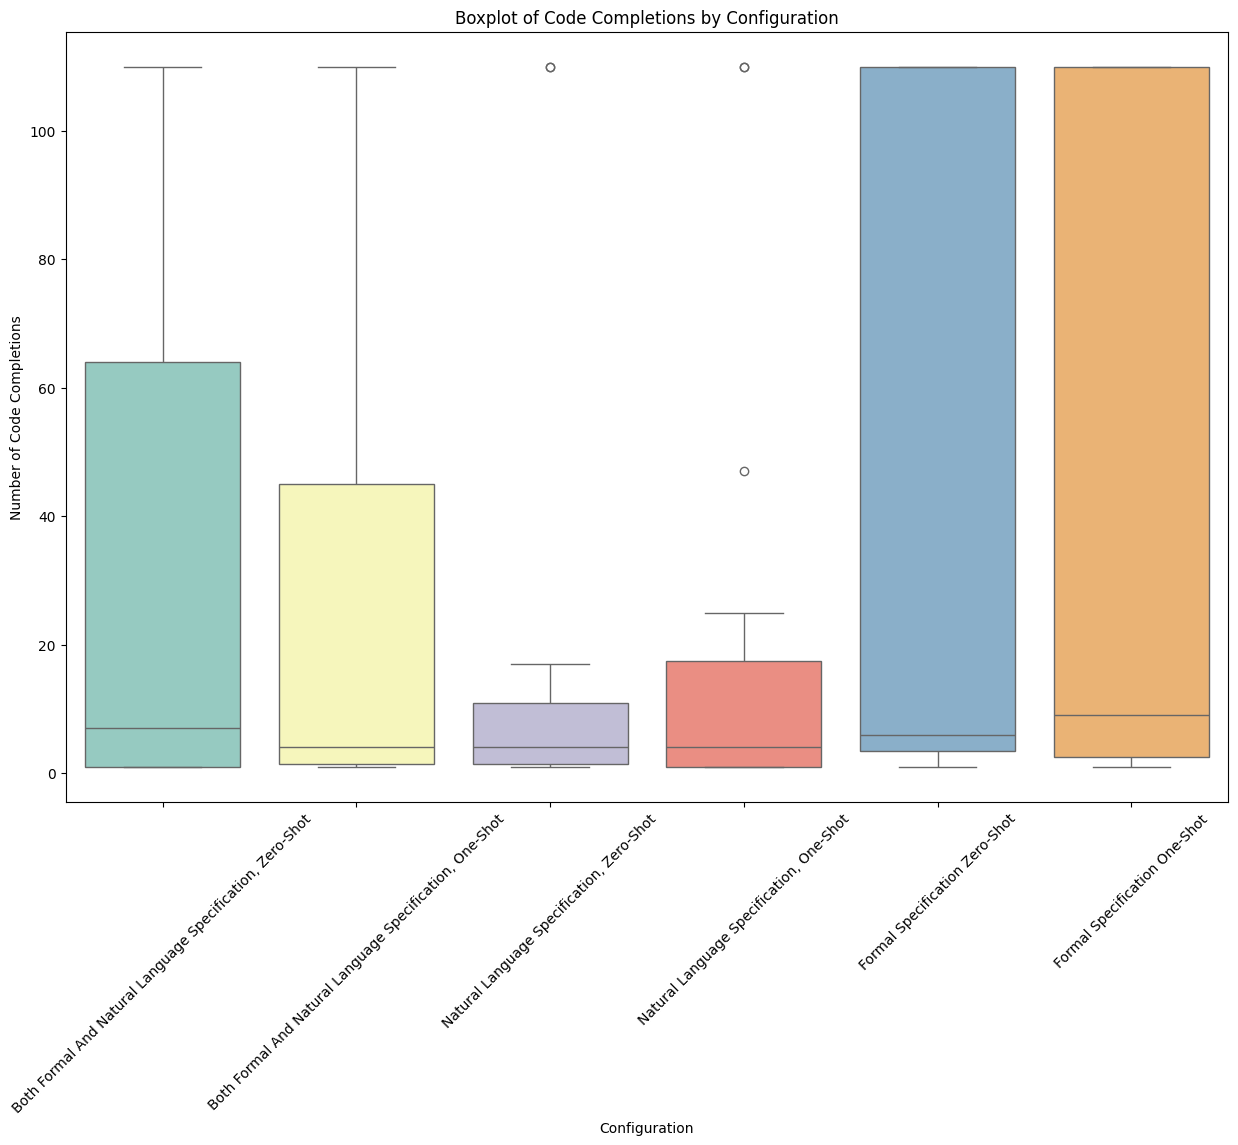

In [41]:

# Data
data = {
    'SHEET_NAME': range(1, 16),
    'Both Formal And Natural Language Specification, Zero-Shot': [1, 1, 1, 5, 1, 66, 1, 5, 62, 14, 7, 110, 20, 103, 110],
    'Both Formal And Natural Language Specification, One-Shot': [39, 1, 1, 110, 1, 3, 2, 13, 2, 6, 1, 110, 4, 51, 110],
    'Natural Language Specification, Zero-Shot': [2, 1, 4, 110, 1, 4, 1, 11, 2, 17, 2, 11, 9, 1, 110],
    'Natural Language Specification, One-Shot': [1, 1, 2, 47, 1, 6, 1, 25, 10, 110, 4, 6, 1, 2, 110],
    'Formal Specification Zero-Shot': [110, 4, 5, 1, 1, 71, 1, 110, 6, 110, 6, 110, 31, 3, 110],
    'Formal Specification One-Shot': [110, 1, 3, 110, 1, 33, 7, 110, 11, 2, 9, 110, 2, 110, 3]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Replace empty strings with NaN to avoid plotting them
df.replace('', pd.NA, inplace=True)

# Convert the DataFrame to a long format for seaborn
df_melted = df.melt(id_vars='SHEET_NAME', var_name='Configuration', value_name='Completions')

# Create a boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Configuration', y='Completions', data=df_melted, palette='Set3')

# Adding labels and title
plt.xlabel('Configuration')
plt.ylabel('Number of Code Completions')
plt.title('Boxplot of Code Completions by Configuration')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
